In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import cufflinks as cf
cf.go_offline()
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [3]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [4]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [5]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [6]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.364254  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.009888  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.052410  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.002804  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.024086  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  35.224968  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  35.249130  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.345779  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.382019  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  35.756580  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.104456  
2006-01-04   31.799999  31.530001  10870000.0  19.871267  
2006-01-05   31.500000  31.495001  10158000.0  19.849216  
2006-01-06   31.580000  31.680000   8403800.0  19.965803  
2006-01-09   31.674999  31.674999   5619600.0  19.962650  

[5 rows x 36 columns]

In [7]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max() #Max Close Time

Stock Info
High         5.508000e+01
Low          5.482000e+01
Open         5.504000e+01
Close        5.490000e+01
Volume       1.226791e+09
Adj Close    4.034871e+01
dtype: float64

In [8]:
returns = pd.DataFrame()

In [9]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


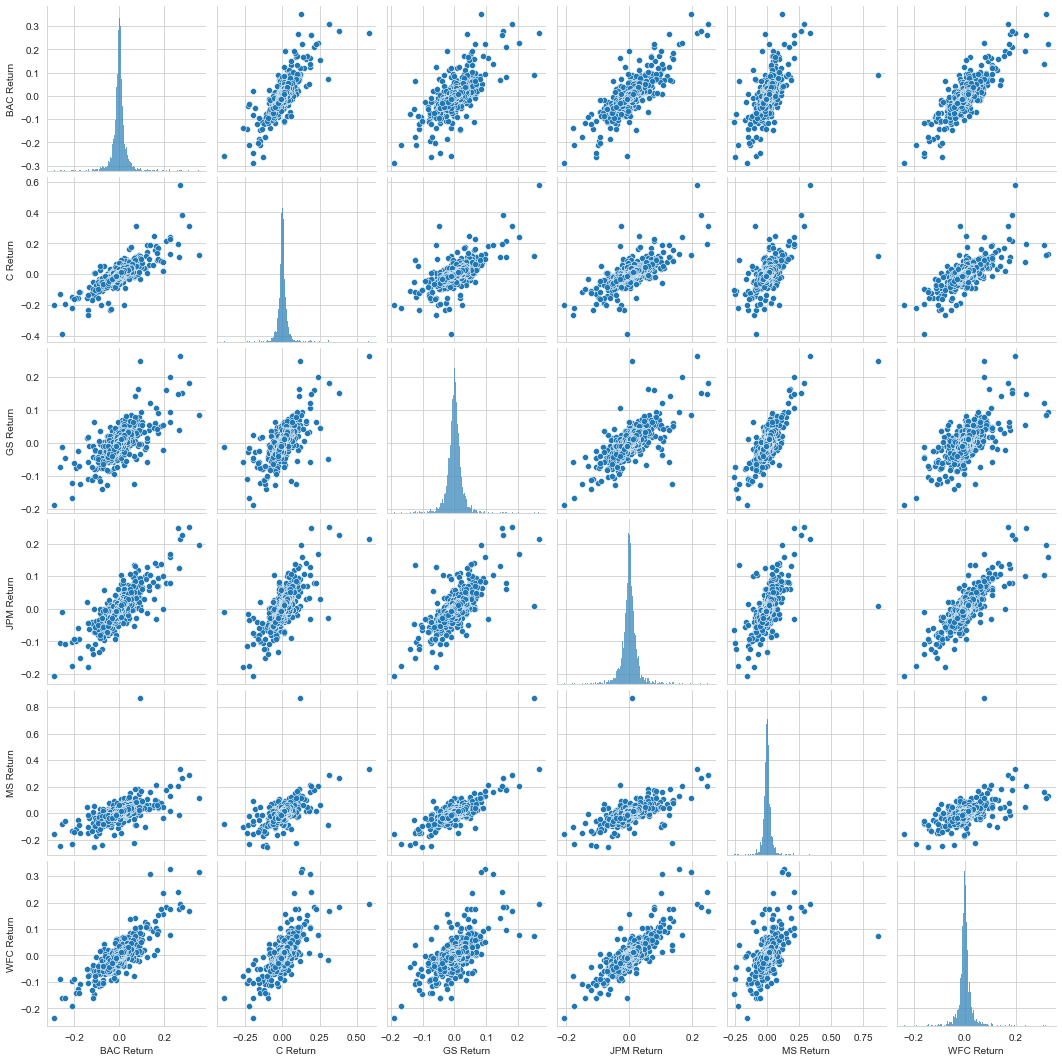

In [10]:
sns.pairplot(returns[1:])

In [11]:
returns.idxmin() #Date of Largest Drop

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [12]:
returns.idxmax() #Date of Largest Gain

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [13]:
returns.std() #Standard deviation of the returns / C riskiest

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [15]:
returns.loc['2015-01-01':'2015-12-31'].std() # Very similar risk profiles, but MG or BAC are the riskiests

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

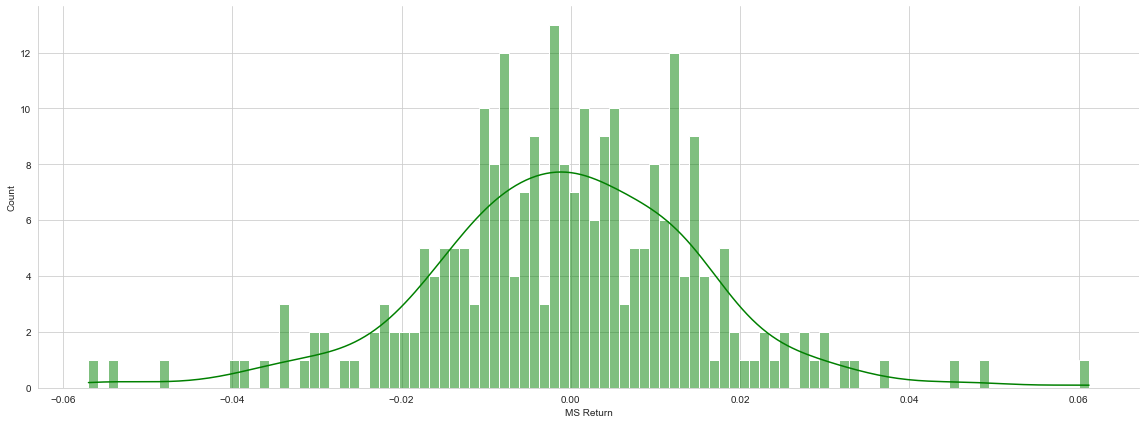

In [17]:
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100,height=6,aspect=2.67, kde=True)
#Distplot using seaborn of the 2015 returns for Morgan Stanley

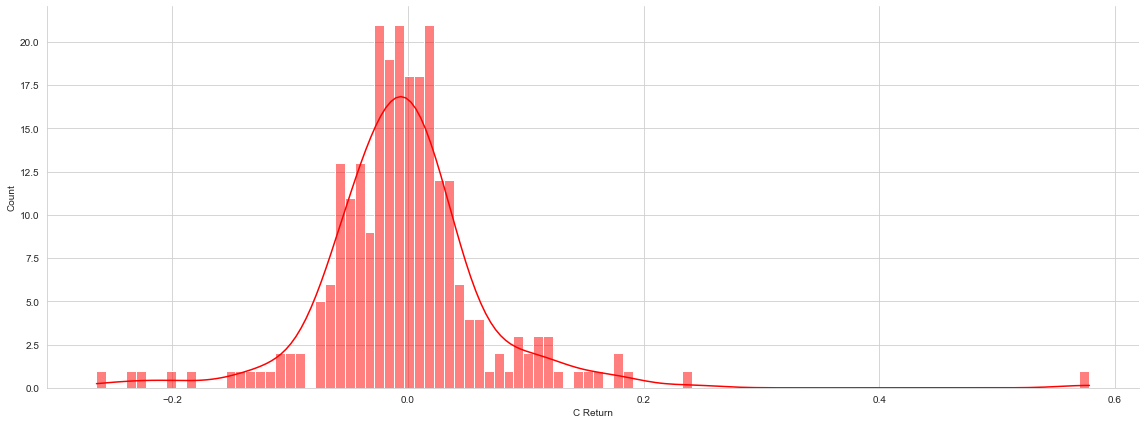

In [18]:
sns.displot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100, kde=True, height=6,aspect=2.67)
#distplot using seaborn of the 2008 returns for CitiGroup

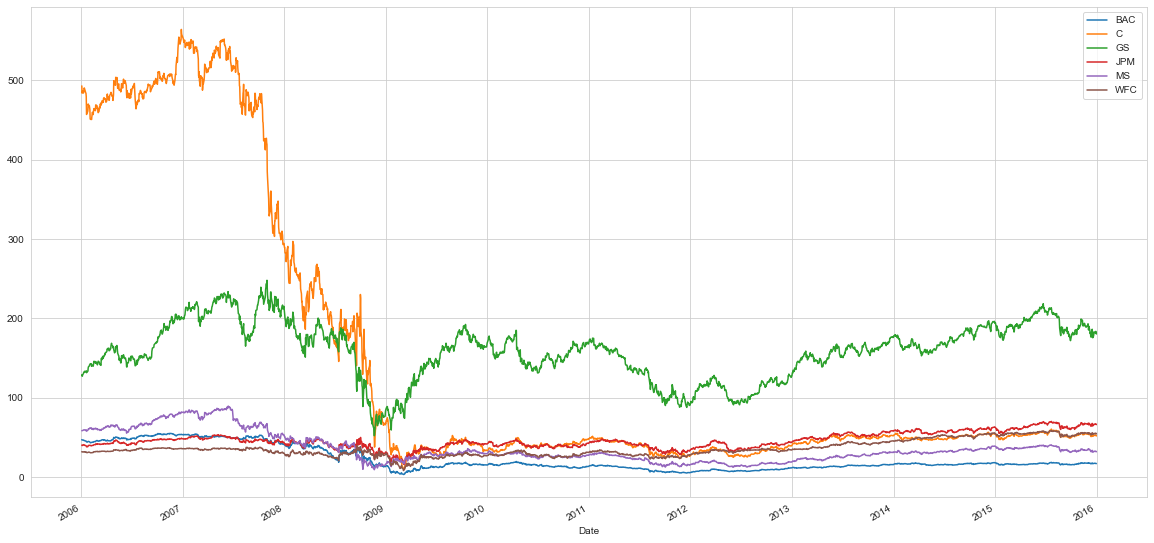

In [19]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(20,10),label=tick)
plt.legend() #Close price for each bank for the entire index of time

In [20]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

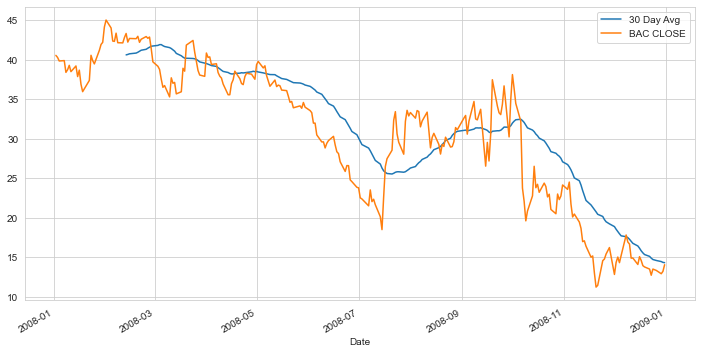

In [21]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend() #30 day average against the Close Price for Bank Of America's stock for the year 2008

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

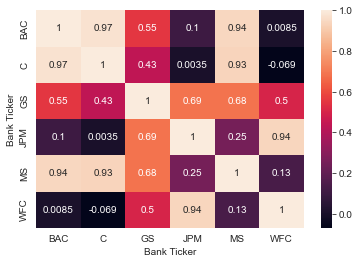

In [22]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)
#Heatmap of the correlation between the stocks Close Price

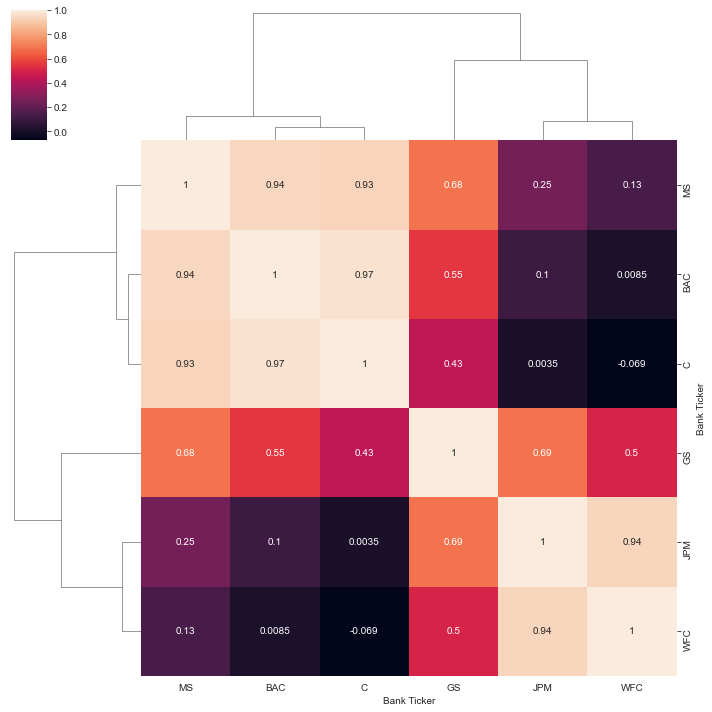

In [23]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [24]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [25]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')
#Candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016

In [26]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')
# Moving Averages plot of Morgan Stanley for the year 2015